In [183]:
import urllib, json


url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())
opacity = 0.4
# colors = data['data'][0]['node']['color'] 
node_colors = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
link_colors = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

link_colors = link_colors * 2

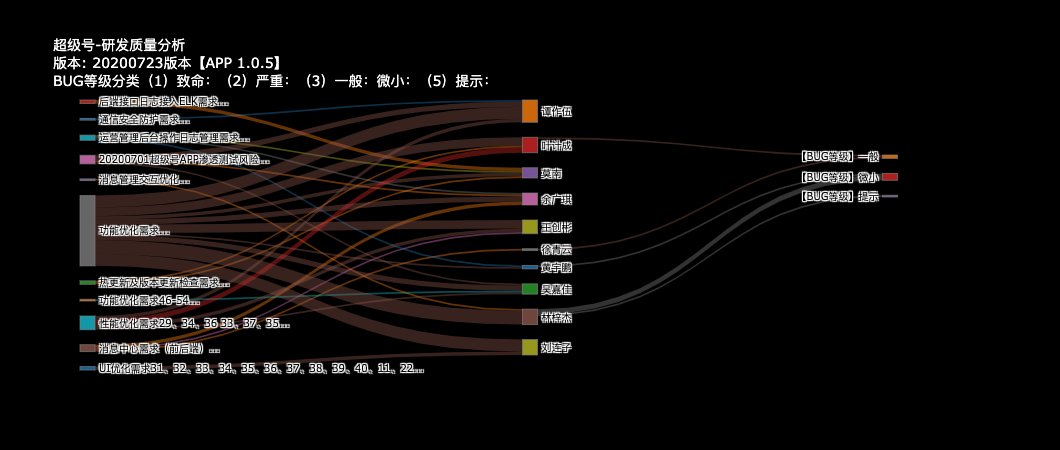

In [219]:
import pandas as pd
import numpy  as np
import urllib, json
import plotly.graph_objects as go


# 数据映射方式将名字缩写变更为名字全称
full_name = {'创彬':'王创彬','王创彬':'王创彬',
            '嘉佳':'吴嘉佳','吴嘉佳':'吴嘉佳',
            '计成':'叶计成','叶计成':'叶计成',
            '连子':'刘连子','刘连子':'刘连子',
            '作伍':'谭作伍','谭作伍':'谭作伍',
            '梓杰':'林梓杰','林梓杰':'林梓杰',
            '青云':'徐青云','徐青云':'林梓杰',
            '宇鹏':'黄宇鹏','黄宇鹏':'林梓杰',
            '广琪':'余广琪','余广琪':'林梓杰',
            '晓泉':'龙晓泉','龙晓泉':'林梓杰'
            }

# url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
# response = urllib.request.urlopen(url)
# data = json.loads(response.read())


label_colors = ['rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(148, 103, 189, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)',
 'rgba(23, 190, 207, 0.8)',
 'rgba(31, 119, 180, 0.8)',
 'rgba(255, 127, 14, 0.8)',
 'rgba(44, 160, 44, 0.8)',
 'rgba(140, 86, 75, 0.8)',
 'rgba(227, 119, 194, 0.8)',
 'rgba(127, 127, 127, 0.8)',
 'rgba(188, 189, 34, 0.8)'] 

# label_colors = ['rgba(31, 119, 180, 0.8)',
#  'rgba(255, 127, 14, 0.8)',
#  'rgba(214, 39, 40, 0.8)',
#  'rgba(44, 160, 44, 0.8)',
#  'rgba(148, 103, 189, 0.8)',
#  'rgba(140, 86, 75, 0.8)',
#  'rgba(227, 119, 194, 0.8)',
#  'rgba(127, 127, 127, 0.8)',
#  'rgba(188, 189, 34, 0.8)',
#  'rgba(23, 190, 207, 0.8)',
#  'rgba(31, 119, 180, 0.8)',
#  'rgba(255, 127, 14, 0.8)',
#  'rgba(214, 39, 40, 0.8)',
#  'rgba(44, 160, 44, 0.8)',
#  'rgba(148, 103, 189, 0.8)',
#  'rgba(140, 86, 75, 0.8)',
#  'rgba(227, 119, 194, 0.8)',
#  'rgba(127, 127, 127, 0.8)',
#  'rgba(188, 189, 34, 0.8)',
#  'rgba(23, 190, 207, 0.8)',
#  'rgba(31, 119, 180, 0.8)',
#  'rgba(255, 127, 14, 0.8)',
#  'rgba(44, 160, 44, 0.8)',
#  'rgba(140, 86, 75, 0.8)',
#  'rgba(214, 39, 40, 0.8)',
#  'rgba(148, 103, 189, 0.8)',
#  'rgba(227, 119, 194, 0.8)',
#  'rgba(127, 127, 127, 0.8)',
#  'rgba(188, 189, 34, 0.8)'] 

bug_level_map = {'1级':'【BUG等级】致命','2级':'【BUG等级】严重','3级':'【BUG等级】一般','4级':'【BUG等级】微小','5级':'【BUG等级】提示'}

pd.set_option('display.max_rows', None)

# 
# 流水线任务分配信息
# 
works=pd.read_html("../missions", encoding='utf8')
works[1].drop('Unnamed: 0', axis=1).set_index(['需求ID'])
dd=works[1].drop('Unnamed: 0',axis=1)
# 按需求ID聚合
missions=dd.sort_values(by='需求ID')[['需求ID','需求名称','开发人员']]
missions['NUM'] = 1

label = missions[['需求ID','开发人员','NUM','需求名称']]
grouped = label['NUM'].groupby([label['需求ID'],label['开发人员']])
statics = dict(grouped.size())

data = [(key1,key2, statics[(key1,key2)]) for (key1,key2) in statics.keys() ]

tm = missions[['需求ID','需求名称']]
req_map = {}
for i in tm.index:
    req_map[tm.iloc[i,0]] = tm.iloc[i,1].split("\"")[0] + '...'

    
#         
# BUG 列表信息
# 

bug_list = pd.read_csv('../超级号APP问题收集列表.csv')
bug_list[bug_list['需求池ID'].isnull()]
tmp_bug = bug_list[~bug_list['维修人员'].isnull()][['维修人员','BUG等级']]



stat_bug = dict(tmp_bug['BUG等级'].groupby([tmp_bug['维修人员'],tmp_bug['BUG等级']]).size())
data_bug = [(i,j,stat_bug[(i,j)]) for (i,j) in stat_bug.keys()]        

lable = []
x = []
y = list(np.arange(24)/100)

position = (0,0.5,0.9)

for (key1, key2) in statics.keys():
    if key1 not in lable:
        lable.append(key1)
        x.append(position[0])
    if key2 not in lable:
        lable.append(key2)
        x.append(position[1])

for (_,key2) in stat_bug:
    if key2 not in lable:
        lable.append(bug_level_map[key2])
        x.append(position[2])

# lable = tuple(lable)
# pilot    
# 映射对应关系列表
# 

sources = []
targets = []
values  = []

for (i,j,k) in data:
    sources.append(lable.index(i))
    targets.append(lable.index(j))
    values.append(k)

for (i,j,k) in data_bug:
    sources.append(lable.index(i))
    idx = bug_level_map[j]
    targets.append(lable.index(idx))
#     targets.append(lable.index(j))
    values.append(k)


# t = len(sources)
for i in lable:
    if type(i) == int:
        lable[lable.index(i)] = req_map[i]

color = link_colors[0:41] 
# colors[0:41]

fig = go.Figure(data=[go.Sankey(
    valueformat = "",
    arrangement = "snap",
    valuesuffix = "【开发任务数】",
    node = dict(
      pad = 15,
      thickness = 15,    
      line = dict(color = 'gray', width = 0.5),
      label =  lable,
      x=x,
      y=y,
      color =  colors
    ),
    link = dict(
      source =  sources,
      target =  targets,
      value =  values,
      color = link_colors
#       label =  data['data'][0]['link']['label']
  ))])

fig.update_layout(
    hovermode = 'x',
    title="超级号-研发质量分析<br>版本: 20200723版本【APP 1.0.5】<br>BUG等级分类（1）致命：（2）严重：（3）一般：微小：（5）提示：",
    font=dict(size =10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()
fig.write_html('/Users/dengjiaying/Project/gitee/Statics/SIMAPP/SIM20200723版本.html')